Script 3-1: create Franchophone country network and analyze trend flow

In [3]:
#load needed packages
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
#create Francophone country network
G = nx.Graph()
G.add_nodes_from([1, 23])
G.add_edges_from([(23,13),(13,11),(12,13),(13,18),(13,1),(12,3),(12,18),
                 (3,22),(3,18),(3,21),(3,20),(18,1),(18,14),(18,17),(18,21),
                 (21,17),(21,14),(17,14),(14,1),(14,6),(14,5),(6,5),(1,8),
                 (8,16),(8,7),(16,7),(16,2),(16,4),(16,19),(19,4),(4,2),
                 (7,10),(2,10),(10,15),(10,9)])

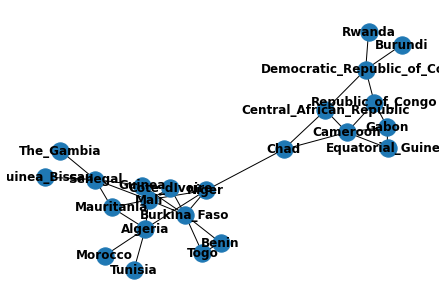

In [5]:
#plot the Francophone network
import matplotlib.pyplot as plt
G.nodes[1]['country'] = 'Niger'
G.nodes[2]['country'] = 'Republic_of_Congo'
G.nodes[3]['country'] = 'Senegal'
G.nodes[4]['country'] = 'Gabon'
G.nodes[5]['country'] = 'Benin'
G.nodes[6]['country'] = 'Togo'
G.nodes[7]['country'] = 'Central_African_Republic'
G.nodes[8]['country'] = 'Chad'
G.nodes[9]['country'] = 'Rwanda'
G.nodes[10]['country'] = 'Democratic_Republic_of_Congo'
G.nodes[11]['country'] = 'Morocco'
G.nodes[12]['country'] = 'Mauritania'
G.nodes[13]['country'] = 'Algeria'
G.nodes[14]['country'] = 'Burkina_Faso'
G.nodes[15]['country'] = 'Burundi'
G.nodes[16]['country'] = 'Cameroon'
G.nodes[17]['country'] = 'Cote_dIvoire'
G.nodes[18]['country'] = 'Mali'
G.nodes[19]['country'] = 'Equatorial_Guinea'
G.nodes[20]['country'] = 'The_Gambia'
G.nodes[21]['country'] = 'Guinea'
G.nodes[22]['country'] = 'Guinea_Bissau'
G.nodes[23]['country'] = 'Tunisia'
labels = nx.get_node_attributes(G, 'country')
nx.draw(G, labels=labels, font_weight='bold')

In [1]:
#install and import epidemic models
!pip install ndlib
import ndlib.models.epidemics as ep

In [6]:
# Model Selection
model = ep.SIRModel(G)

In [7]:
# Model Configuration
import ndlib.models.ModelConfig as mc

config = mc.Configuration()
config.add_model_parameter('beta', 0.25)
config.add_model_parameter('gamma', 0.1)
config.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(config)

In [8]:
# Simulation
iterations = model.iteration_bunch(50)
trends = model.build_trends(iterations)

In [9]:
#visualize spread dynamics
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend

viz = DiffusionTrend(model, trends)
p = viz.plot(width=500, height=400)
show(p)

Change Parameters of Script 3-1 to a reproductive number less than 1.

In [10]:
# Model Configuration
model = ep.SIRModel(G)
config = mc.Configuration()
config.add_model_parameter('beta', 0.25)
config.add_model_parameter('gamma', 0.3)
config.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(config)

In [11]:
# Simulation
iterations = model.iteration_bunch(50)
trends = model.build_trends(iterations)

In [12]:
#visualize spread dynamics
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend

viz = DiffusionTrend(model, trends)
p = viz.plot(width=500, height=400)
show(p)

Script 3-2: create new AIMS Cameroon student network and analyze epidemics

In [13]:
#import needed packages
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np
import math

In [16]:
#reading the dataset
fichier = pd.read_csv("/Users/franckm/Documents/draftcodefiles/AIMS_data.csv")
data = pd.DataFrame(fichier)

In [17]:
#intializing the social network
aimsNetwork = nx.Graph()

#populating the network with nodes and edges
for i in range(len(data["Name"])) : 
    aimsNetwork.add_node(data["Name"][i], Age=data["Age"][i],country=data["Country"][i],   
    Field=data["Field"][i], background=data["Background"][i])

#define length
N = len(aimsNetwork.nodes())

In [18]:
# one can build the adjacency matrix
Adj_matrix = np.zeros((N,N))  
AIMS_by_Country_or_Field = nx.Graph()
edges = []

In [19]:
#define objects
AIMS = aimsNetwork
students = list(AIMS.nodes())

In [20]:
#create edges
for i in range(N-1): 
    for j in range(i+1,N):
        sti = students[i]
        stj = students[j]
        if AIMS.nodes[sti]['Field'] == AIMS.nodes[stj]['Field'] or \
            AIMS.nodes[sti]['country'] == AIMS.nodes[stj]['country']:        
            AIMS_by_Country_or_Field.add_edge(sti,stj)

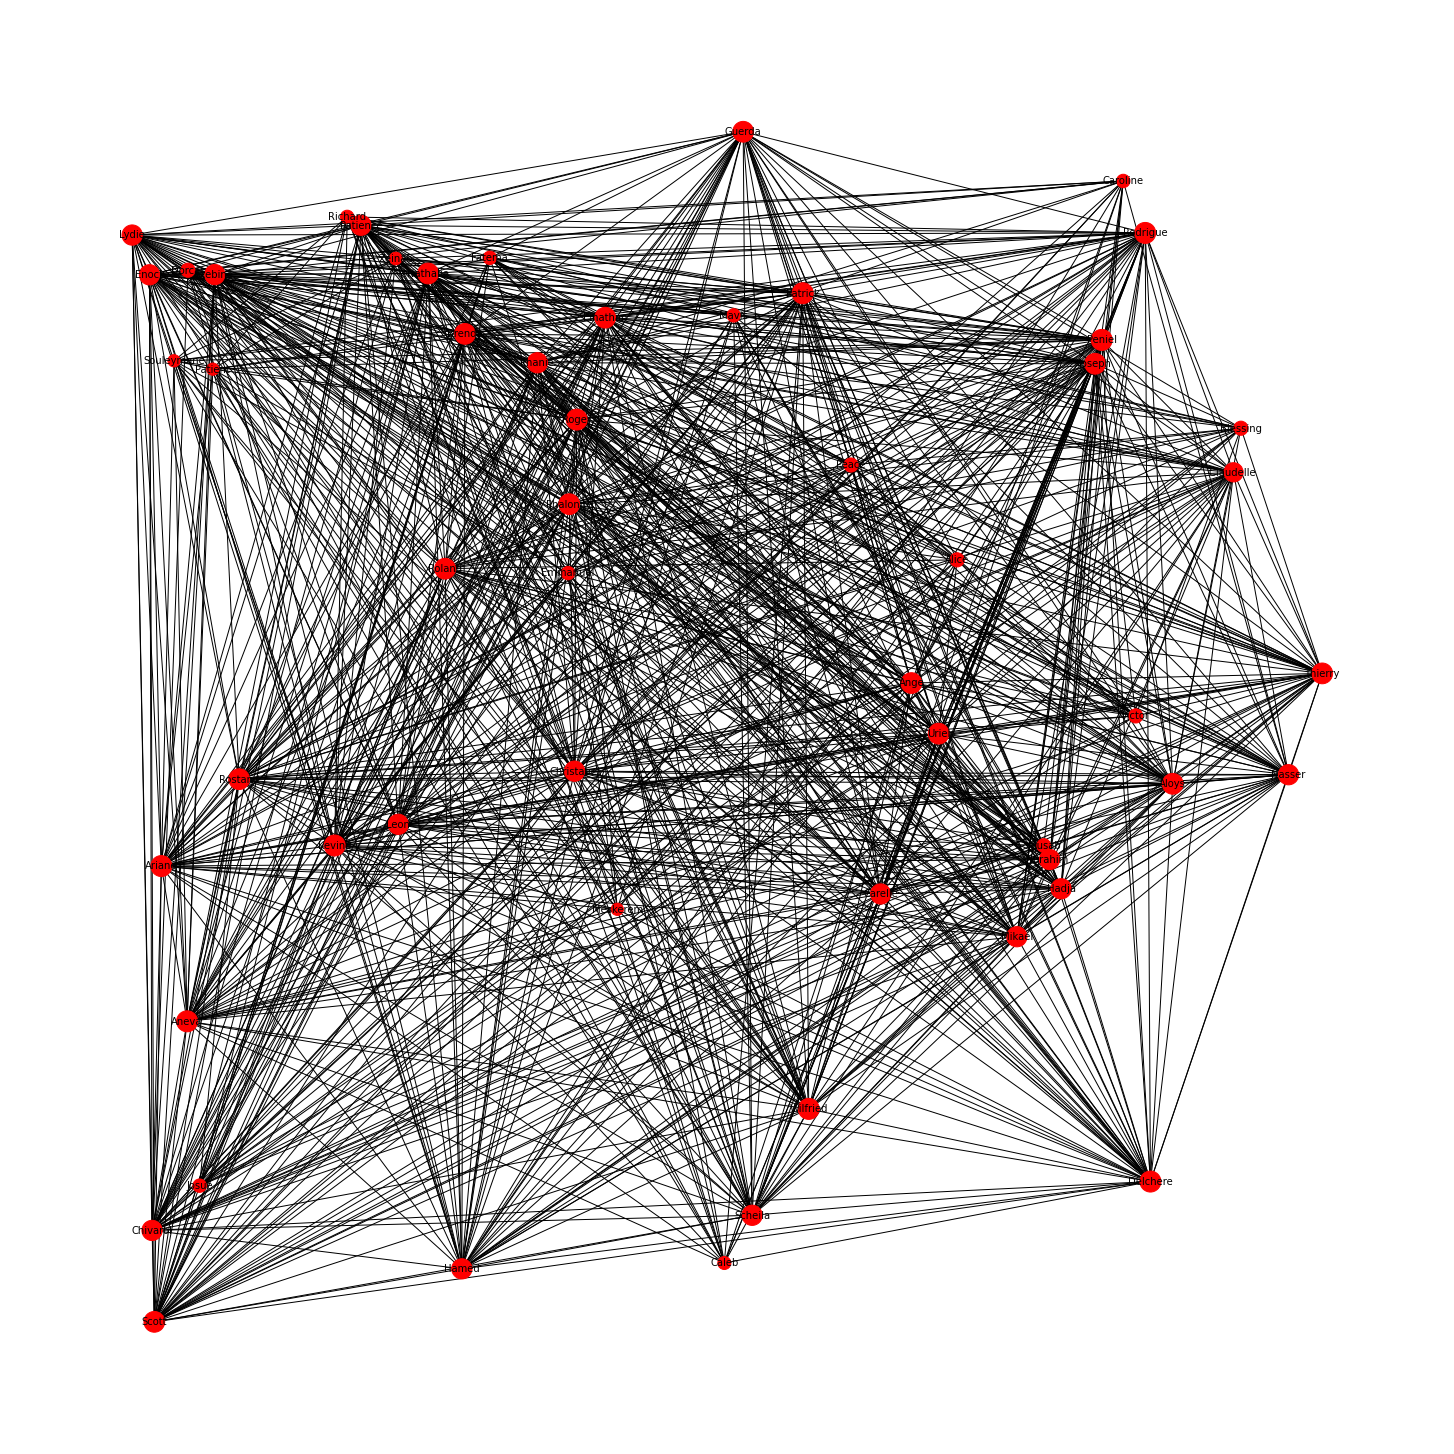

In [21]:
#create plot
Degree=AIMS_by_Country_or_Field.degree() 
var = [10*k[1] for k in list(Degree)]
plt.figure(figsize=(20,20))
nx.draw_random(AIMS_by_Country_or_Field, font_size=10,node_size = var, with_labels=True, node_color="red")
plt.show()

In [22]:
#Run the simulated epidemic on the AIMS Cameroon student network
model = ep.SIRModel(G)
config = mc.Configuration()
config.add_model_parameter('beta', 0.25)
config.add_model_parameter('gamma', 0.1)
config.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(config)
iterations = model.iteration_bunch(50)
trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
p = viz.plot(width=500, height=400)
show(p)

Change parameters of Script 3-2 epidemic

In [23]:
#Run the simulated epidemic on the AIMS Cameroon student network
model = ep.SIRModel(G)
config = mc.Configuration()
config.add_model_parameter('beta', 0.25)
config.add_model_parameter('gamma', 0.3)
config.add_model_parameter("fraction_infected", 0.05)
model.set_initial_status(config)
iterations = model.iteration_bunch(50)
trends = model.build_trends(iterations)
viz = DiffusionTrend(model, trends)
p = viz.plot(width=500, height=400)
show(p)